In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv("C:\\Users\\ritik\\Downloads\\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

- taking two factors on which we will make the clusters

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending Score (1-100)')

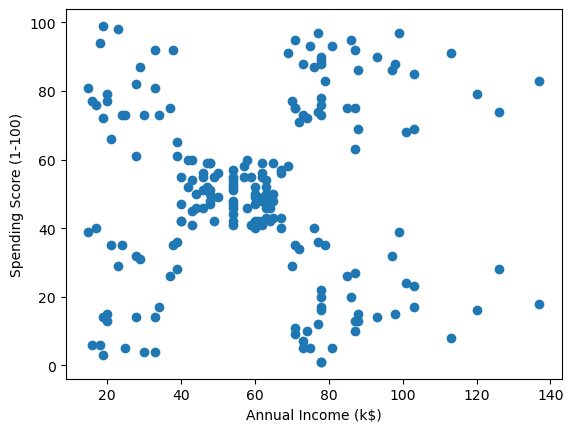

In [7]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [8]:
kmeans=KMeans()
clusters=kmeans.fit_predict(x)

In [9]:
clusters

array([3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 0, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 0, 6, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2,
       4, 2, 5, 2, 5, 2, 5, 2, 5, 2, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 4, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7])

In [10]:
x[clusters==0]["Annual Income (k$)"]

27    28
40    38
42    39
43    39
45    39
46    40
47    40
48    40
49    40
50    42
51    42
52    43
53    43
54    43
55    43
56    44
57    44
58    46
59    46
60    46
61    46
62    47
63    47
64    48
65    48
66    48
67    48
68    48
69    48
70    49
71    49
72    50
73    50
75    54
76    54
78    54
80    54
81    54
84    54
Name: Annual Income (k$), dtype: int64

In [11]:
x[clusters==0]["Spending Score (1-100)"]

27    61
40    35
42    36
43    61
45    65
46    55
47    47
48    42
49    42
50    52
51    60
52    54
53    60
54    45
55    41
56    50
57    46
58    51
59    46
60    56
61    55
62    52
63    59
64    51
65    59
66    50
67    48
68    59
69    47
70    55
71    42
72    49
73    56
75    54
76    53
78    52
80    51
81    55
84    57
Name: Spending Score (1-100), dtype: int64

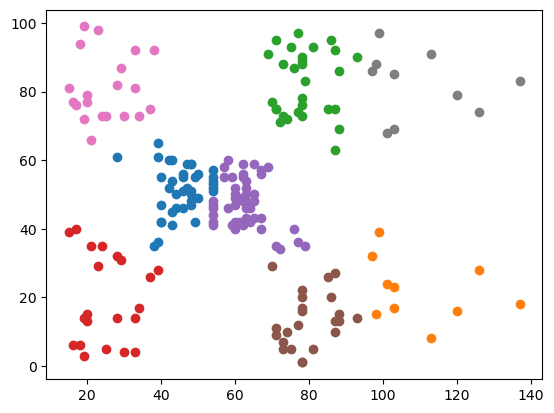

In [12]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"],x[clusters==7]["Spending Score (1-100)"])

In [13]:
from sklearn import metrics
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [14]:
silhouette_score(x,kmeans.labels_)

0.4558493609925033

In [15]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25061.304119069333,
 21913.92920119442,
 19643.655552199736,
 17844.59134199134,
 16322.450608370957,
 14672.07267533808,
 13219.830636030638]

Text(0, 0.5, 'wcss')

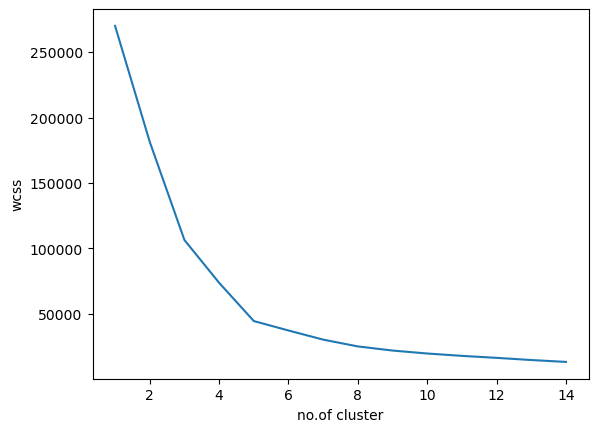

In [17]:
plt.plot(list(range(1,15)),wcss)
plt.xlabel("no.of cluster")
plt.ylabel("wcss")

- from this elbow plot that we can see elbow point is 5 so we use 5 clusters as k for k means

In [24]:
kmeans=KMeans(n_clusters=6)
clusters=kmeans.fit_predict(x)

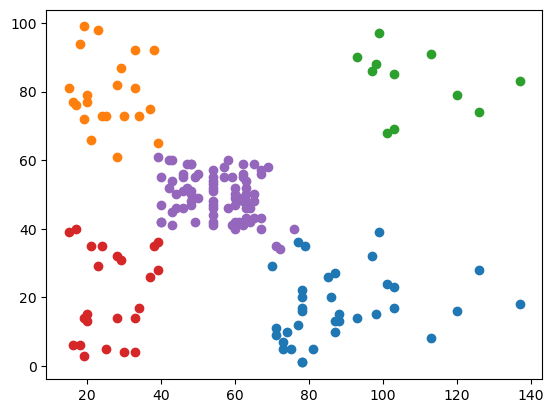

In [25]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])


In [20]:
silhouette_score(x,kmeans.labels_)

0.553931997444648